<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Machine%20Learning%3A%20Logistic%20Regression%20and%20Confusion%20Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 13: Machine Learning Review**
---
### **Description**
Throughout this notebook, you'll review how to implement a logistic regression model.



### **Lab Structure**
* **Part 1**: [College Admissions Dataset](#p1)

* **Part 2**: [Water Quality Dataset](#p2)





<br>


### **Resources**


* [Logistic Regression with sklearn](https://docs.google.com/document/d/1a2MbrwRDCP3cpnLs2n2qG-4qbR9TEP6xnfdI7cl_vzQ/edit?usp=sharing)



<br>

**Run the code below before continuing.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: College Admissions Dataset**
---
#### **About the Dataset**
We've already explored this dataset; now it's time to create a logistic regression model using it! The college admissions dataset contains information on various factors that could influence admission decisions. The dataset includes attributes such as admission status (admit), Graduate Record Examination (GRE) score, Grade Point Average (GPA), socioeconomic status (SES), gender (Gender_Male), race, and undergraduate rank (rank). These features provide insights into the characteristics of applicants and their likelihood of being admitted to a college or university.

The features are as follows:

* `admit`: A binary indicator of whether the student was admitted or not (0: no, 1: yes)
* `gre`: Score obtained on the Graduate Record Examination (ranging from 200-800)
* `gpa`: Grade point average (out of 4.00)
* `ses`: Socioeconomic status (1: low, 2: medium, 3: high)
* `Gender_Male`: A binary indicator of whether the student is male or female (0: female, 1: male)
* `Race`: The race or ethnicity of applicants, which can be categorized into different groups (1: Hispanic, 2: Asian, 3: African American)
* `rank`: The rank or prestige level of applicants' undergraduate institutions, often represented as ordinal values (e.g., 1 = Highest rank, 4 = Lowest rank).


<br>

#### **Your Task**
Using the College Admissions dataset, we will do the following:
* Create a logistic regression model that can predict whether or not a student will be admitted into college


### **Step #1: Load the data**

Use the following code to load the college admissions dataset.

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/college_admissions/Admission.xlsx"
admissions_df = pd.read_excel(url)
admissions_df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


### **Step #2: Decide independent and dependent variables**

We are going to use `gre` and `gpa` as our independent variables for predicting `admit`.

In [ ]:
features = admissions_df[['gre', 'gpa']]
label = admissions_df['admit']

### **Step #3: Split the data into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**


In [ ]:
model = LogisticRegression()

### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

### **Step #7: Evaluate the model**

Print the classification report and then plot the confusion matrix.


              precision    recall  f1-score   support

           0       0.68      0.98      0.81        53
           1       0.75      0.11      0.19        27

    accuracy                           0.69        80
   macro avg       0.72      0.55      0.50        80
weighted avg       0.71      0.69      0.60        80



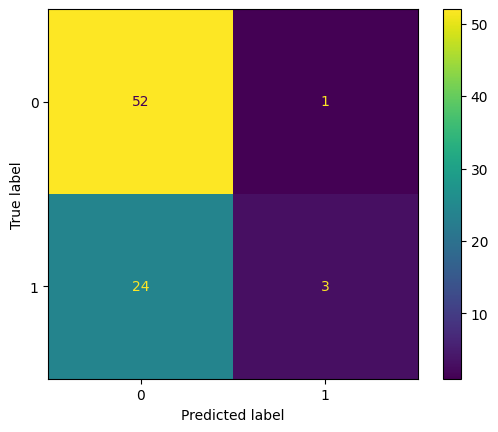

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### **Step #8: Use the model**

Using the model we created, predict whether or not the following two students will be admitted into college:

* **Student 1:** `gre` is 670 and `gpa` is 3.74

* **Student 2:**  `gre` is 780 and `gpa` is 3.92

**Note:** you must create a dataframe containing with the information of the new students:

```python
new_student_data = pd.DataFrame(new_student_data_here, columns = ["gre", "gpa"])
```

In [ ]:
new_student_data = pd.DataFrame({
    "gre": [670, 780],
    "gpa": [3.74, 3.92]
})

predicted_admit = model.predict(new_student_data)
for i, admit_pred in enumerate(predicted_admit):
    print(admit_pred)

0
1


<a name="p2"></a>

---
## **Part 2: Water Quality Dataset**
---

#### **About the Dataset**
Access to clean drinking water is essential for health and a basic human right, and yet nearly 2 billion people around the world do not have access to clean drinking water. In some regions it has been shown that investments in water supply and sanitation can result in a net economic benefit because reductions in health care costs and adverse health effects outweigh the costs of providing interventions.

The features are as follows:
* `Hardness`: capacity of water to precipitate soap in (mg/L)
* `Solids`: total dissolved solids (in ppm)
* `Chloramines`: amount of chloramines (in ppm)
* `Conductivity`: electrical conductivity of the water (in μS/cm)
* `Organic_carbon`: amount of organic carbon in ppm
* `Trihalomethanes`: amount of trihalomethanes (in μg/L)
* `Turbidity`: measure of light emitting property of water (in NTU)
* `Potability`: whether or not the water is safe for human consumption (0: no, 1: yes)

<br>

#### **Your Task**
Using the water quality dataset, we will do the following:
* Create a logistic regression model that can predict whether or not water is safe for drinking

### **Step #1: Load the data**

Use the following code to load the drinking water dataset.

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/drinking_water/drinking_water_cleaned.csv"
df = pd.read_csv(url).drop("Unnamed: 0", axis=1)
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


### **Step #2: Decide independent and dependent variables**

We are going to use all features except `Potability` as our independent variables for predicting `Potability`.

In [ ]:
features = df.loc[:, df.columns != 'Potability']
label = df['Potability']

### **Step #3: Split the data into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**


In [ ]:
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**

In [ ]:
model = LogisticRegression()

### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

### **Step #7: Evaluate the model**

Print the classification report and then plot the confusion matrix.


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       405
           1       0.00      0.00      0.00       218

    accuracy                           0.65       623
   macro avg       0.33      0.50      0.39       623
weighted avg       0.42      0.65      0.51       623



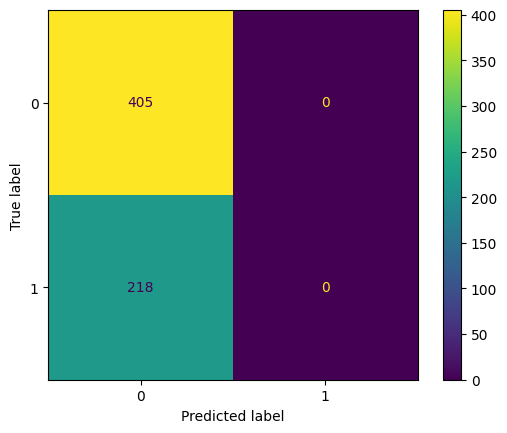

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

---

# End of Notebook

© 2023 The Coding School, All rights reserved